#### The Particular sheet contains the EDA and multiple models trained for this dataset, in order to analyse and select the best model for the project & its deployment. This contains the POC behind why our classifier is better than the pre-existing algos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv(r"C:\Users\Mokshda Sharma\Desktop\My Projects\mental_Health\students_mental_health_survey.csv")


In [ ]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [268]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])


               Missing Values  Percentage (%)
CGPA                       12        0.170891
Substance_Use              15        0.213614


The missing values in the datatset, majorly corresponded to CGPA and Substance-Use attributes 

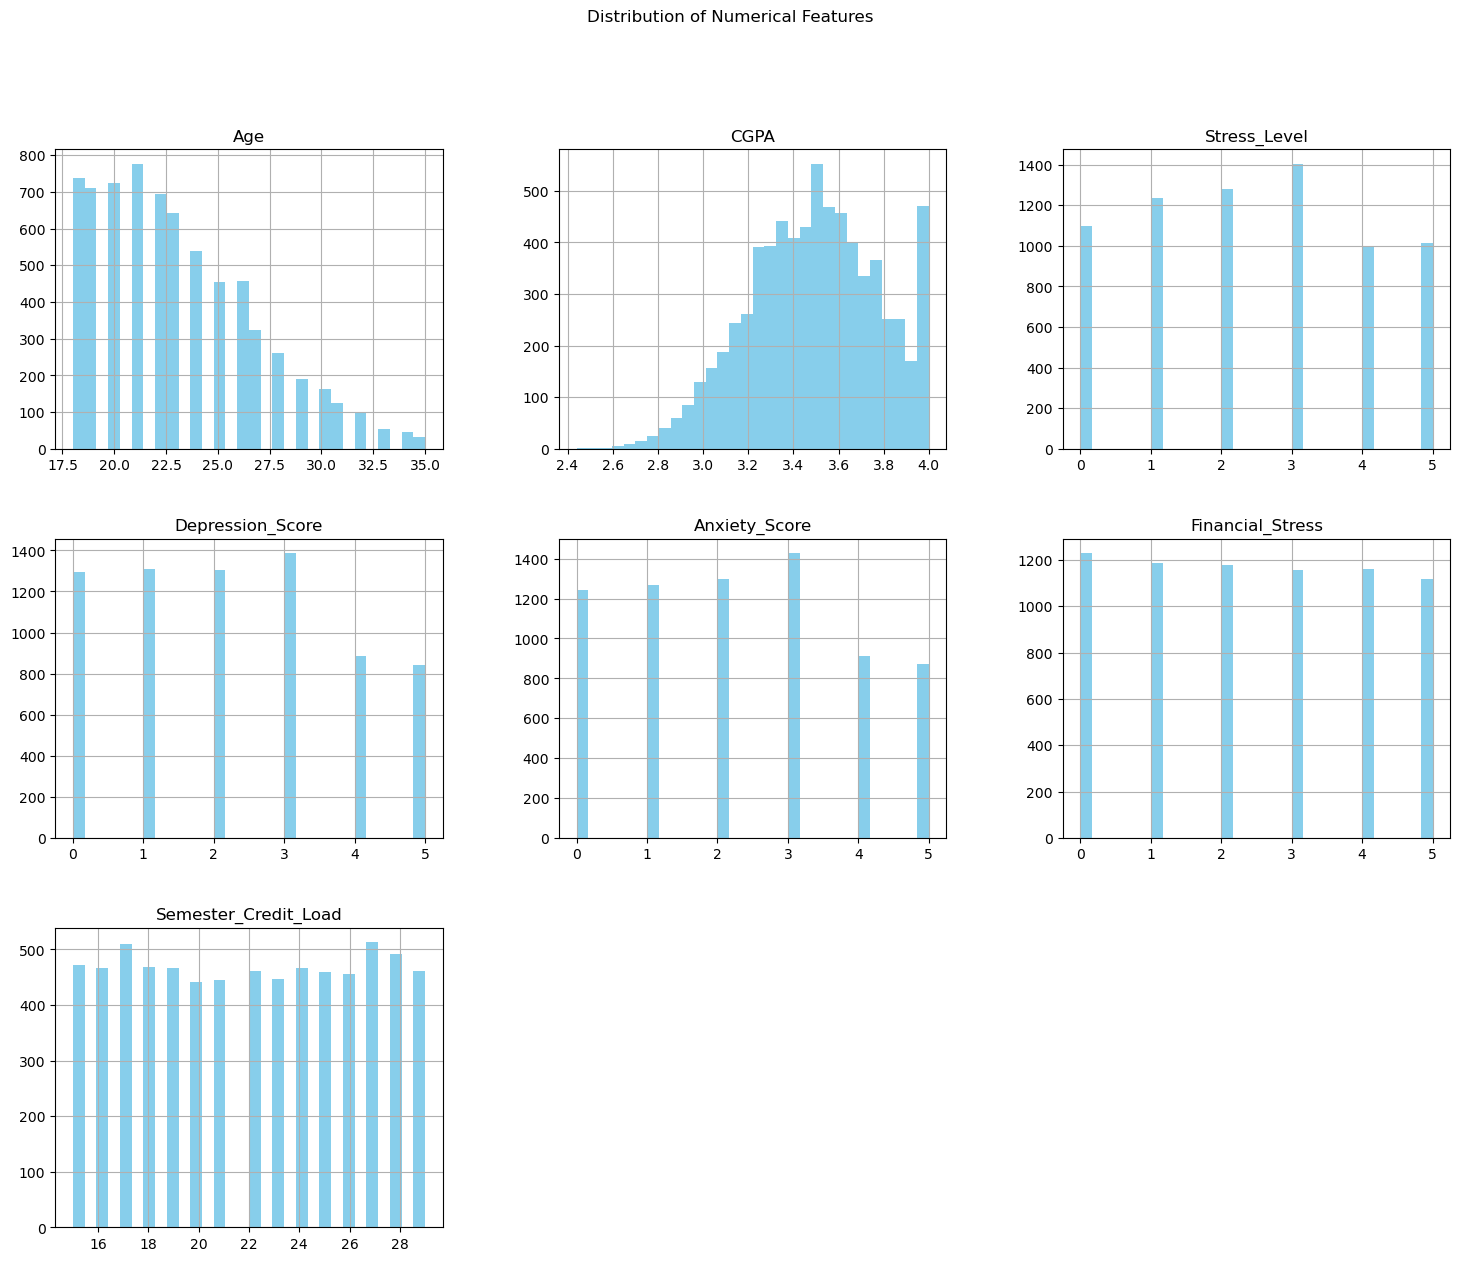

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6856\1918477638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


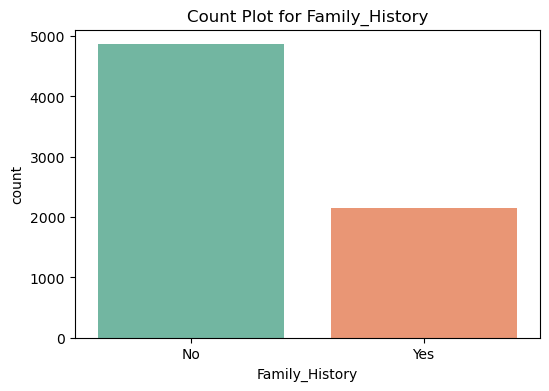

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6856\1918477638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


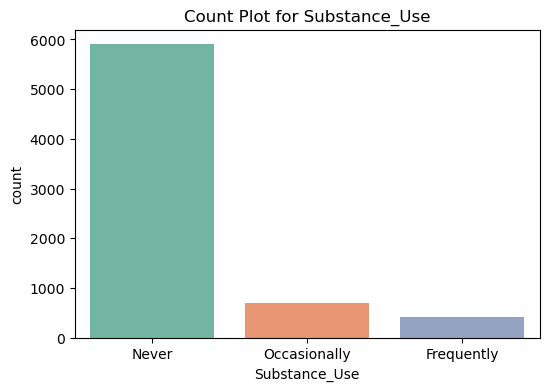

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6856\1918477638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


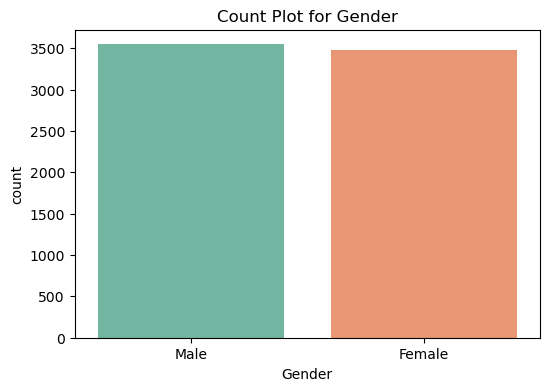

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6856\1918477638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


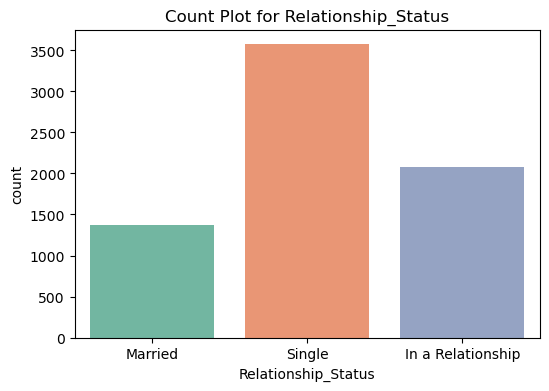

In [270]:
# Histograms for numerical columns
df.hist(figsize=(18, 14), bins=30, color="skyblue")
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Count plots for categorical features
categorical_features = ['Family_History', 'Substance_Use', 'Gender', 'Relationship_Status']
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Count Plot for {col}')
    plt.show()


In [272]:
# Filling missing CGPA with mean
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)

# Filling missing Substance_Use with mode
df['Substance_Use'].fillna(df['Substance_Use'].mode()[0], inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6856\2951578509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6856\2951578509.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e


Logistic Regression Accuracy: 0.8997
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       788
           1       0.91      0.89      0.90       787

    accuracy                           0.90      1575
   macro avg       0.90      0.90      0.90      1575
weighted avg       0.90      0.90      0.90      1575


K-Nearest Neighbors Accuracy: 0.7670
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       788
           1       0.79      0.72      0.76       787

    accuracy                           0.77      1575
   macro avg       0.77      0.77      0.77      1575
weighted avg       0.77      0.77      0.77      1575


Support Vector Machine Accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       788
           1       0.94      0.90      0.92       787

    accuracy                           0.92      1575
   macro av

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Accuracy: 0.9238
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       788
           1       0.92      0.93      0.92       787

    accuracy                           0.92      1575
   macro avg       0.92      0.92      0.92      1575
weighted avg       0.92      0.92      0.92      1575


XGBoost Accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       788
           1       0.95      0.94      0.95       787

    accuracy                           0.95      1575
   macro avg       0.95      0.95      0.95      1575
weighted avg       0.95      0.95      0.95      1575

[LightGBM] [Info] Number of positive: 3150, number of negative: 3149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`

C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



LightGBM Accuracy: 0.9524
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       788
           1       0.95      0.95      0.95       787

    accuracy                           0.95      1575
   macro avg       0.95      0.95      0.95      1575
weighted avg       0.95      0.95      0.95      1575



C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6856\478000417.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")



MLP Classifier Accuracy: 0.9371
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       788
           1       0.95      0.93      0.94       787

    accuracy                           0.94      1575
   macro avg       0.94      0.94      0.94      1575
weighted avg       0.94      0.94      0.94      1575



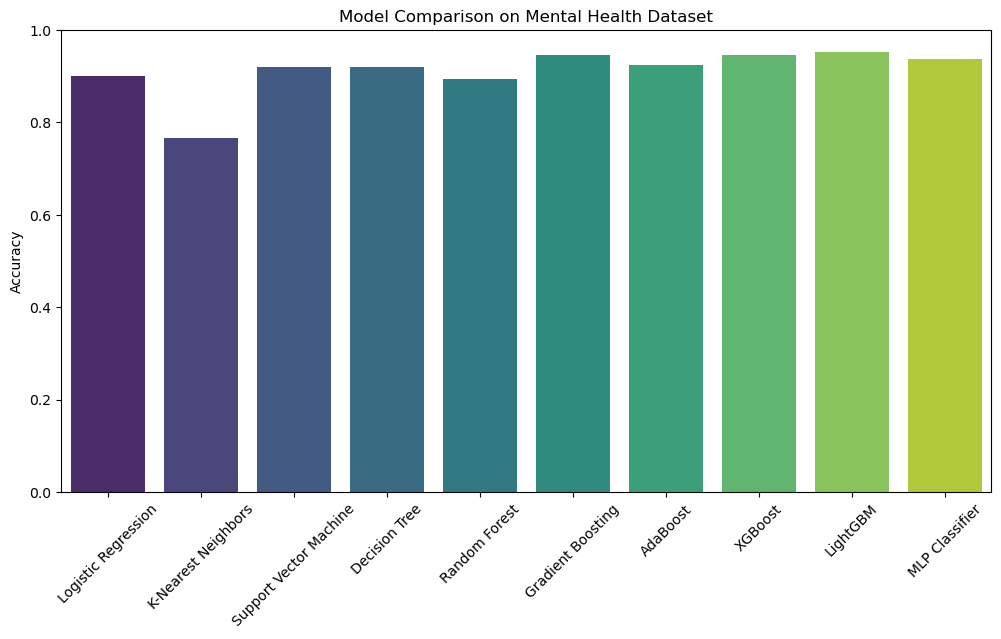

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

# Plot model accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison on Mental Health Dataset")
plt.show()


In [277]:
!pip install lightgbm


In [280]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
base_learners = [
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
]

# Meta learner
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Stacking classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predict and evaluate
stacking_pred = stacking_model.predict(X_test)
stacking_acc = accuracy_score(y_test, stacking_pred)

print(f"Stacking Classifier Accuracy: {stacking_acc:.4f}")


C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3150, number of negative: 3149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1799
[LightGBM] [Info] Number of data points in the train set: 6299, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500079 -> initscore=0.000318
[LightGBM] [Info] Start training from score 0.000318


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:13:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:13:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:13:41] WARNING: C:\buildkite-agent\builds\bui

[LightGBM] [Info] Number of positive: 2520, number of negative: 2519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1703
[LightGBM] [Info] Number of data points in the train set: 5039, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500099 -> initscore=0.000397
[LightGBM] [Info] Start training from score 0.000397
[LightGBM] [Info] Number of positive: 2520, number of negative: 2519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1688
[LightGBM] [Info] Number of data points in the train set: 5039, number of used features: 20
[LightGBM] [Info] [binary:

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Stacking Classifier Accuracy: 0.9549


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [240]:
voting_model = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)),
        ('lgbm', LGBMClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ],
    voting='soft'  # or 'hard'
)

voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
voting_acc = accuracy_score(y_test, voting_pred)

print(f"Voting Classifier Accuracy: {voting_acc:.4f}")


C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:57:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3150, number of negative: 3149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1799
[LightGBM] [Info] Number of data points in the train set: 6299, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500079 -> initscore=0.000318
[LightGBM] [Info] Start training from score 0.000318
Voting Classifier Accuracy: 0.9575


In [281]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Voting Classifier metrics
voting_pred = voting_model.predict(X_test)
voting_proba = voting_model.predict_proba(X_test)[:, 1]

voting_metrics = {
    "Accuracy": accuracy_score(y_test, voting_pred),
    "Precision": precision_score(y_test, voting_pred),
    "Recall": recall_score(y_test, voting_pred),
    "F1-Score": f1_score(y_test, voting_pred),
    "AUC": roc_auc_score(y_test, voting_proba)
}

# Stacking Classifier metrics
stacking_pred = stacking_model.predict(X_test)
stacking_proba = stacking_model.predict_proba(X_test)[:, 1]

stacking_metrics = {
    "Accuracy": accuracy_score(y_test, stacking_pred),
    "Precision": precision_score(y_test, stacking_pred),
    "Recall": recall_score(y_test, stacking_pred),
    "F1-Score": f1_score(y_test, stacking_pred),
    "AUC": roc_auc_score(y_test, stacking_proba)
}

# Combine into a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"],
    "Voting Classifier": list(voting_metrics.values()),
    "Stacking Classifier": list(stacking_metrics.values())
})

print(comparison_df)


      Metric  Voting Classifier  Stacking Classifier
0   Accuracy           0.957460             0.954921
1  Precision           0.958015             0.953165
2     Recall           0.956798             0.956798
3   F1-Score           0.957406             0.954978
4        AUC           0.991270             0.992529


Accuracy: 0.9575
Precision: 0.9580
Recall: 0.9568
F1 Score: 0.9574

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       788
           1       0.96      0.96      0.96       787

    accuracy                           0.96      1575
   macro avg       0.96      0.96      0.96      1575
weighted avg       0.96      0.96      0.96      1575



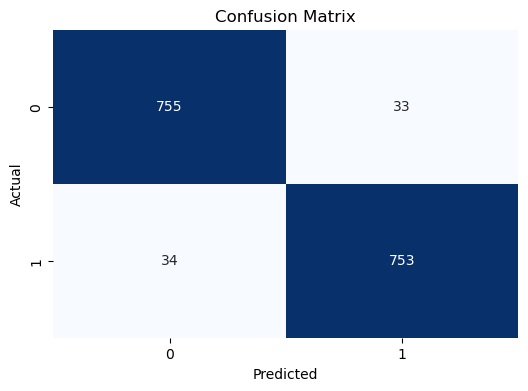

In [284]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = voting_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [286]:
import joblib

# Save model
joblib.dump(voting_model, 'best_voting_model.pkl')

# Load model later
# loaded_model = joblib.load('best_voting_model.pkl')
# preds = loaded_model.predict(X_new)

['best_voting_model.pkl']

In [291]:
print(df.columns)

Index(['Age', 'Course', 'Gender', 'CGPA', 'Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Social_Support', 'Relationship_Status',
       'Substance_Use', 'Counseling_Service_Use', 'Family_History',
       'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement',
       'Semester_Credit_Load', 'Residence_Type', 'Lifestyle_Score',
       'Academic_Stress', 'Financial_Impact'],
      dtype='object')


In [311]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load your trained model and label encoders
voting_model = joblib.load('best_voting_model.pkl')

# Assuming the same label encoders and scaler used during training
label_encoders = {
    'Course': ['Engineering', 'Medical', 'Arts', 'Commerce'],
    'Gender': ['Male', 'Female', 'Other'],
    'Relationship_Status': ['Single', 'In a Relationship', 'Married'],
    'Sleep_Quality': ['Poor', 'Average', 'Good'],
    'Physical_Activity': ['Low', 'Moderate', 'High'],
    'Diet_Quality': ['Poor', 'Average', 'Good'],
    'Social_Support': ['Low', 'Moderate', 'High'],
    'Counseling_Service_Use': ['No', 'Yes'],
    'Chronic_Illness': ['No', 'Yes'],
    'Extracurricular_Involvement': ['No', 'Yes'],
    'Residence_Type': ['On Campus', 'Off Campus'],
    'Substance_Use': ['No', 'Yes'],
    'Family_History': ['No', 'Yes']
}

numerical_cols = ['Lifestyle_Score', 'Academic_Stress', 'Financial_Impact', 'CGPA',
                  'Financial_Stress', 'Semester_Credit_Load', 'Age']

scaler = StandardScaler()

# Collect user input
user_data = {}

# Categorical inputs with numeric options
for col, categories in label_encoders.items():
    print(f"\n{col} options:")
    for idx, option in enumerate(categories):
        print(f"{idx}: {option}")
    while True:
        try:
            value = int(input(f"Enter the number (0-{len(categories)-1}) for {col}: "))
            if value in range(len(categories)):
                user_data[col] = value
                break
            else:
                print(f"❌ Please enter a valid number between 0 and {len(categories)-1}.")
        except ValueError:
            print("❌ Invalid input. Please enter a number.")

# Numerical inputs
user_data['CGPA'] = float(input("Enter CGPA (0-10): "))
user_data['Financial_Stress'] = float(input("Enter Financial Stress (1-5): "))
user_data['Semester_Credit_Load'] = int(input("Enter Semester Credit Load: "))
user_data['Age'] = int(input("Enter Age: "))

# Asking for Stress, Depression, Anxiety scores directly (scale 0-5)
stress_level = float(input("Enter Stress Level (0-5): "))
depression_score = float(input("Enter Depression Score (0-5): "))
anxiety_score = float(input("Enter Anxiety Score (0-5): "))

# Feature Engineering (same as training)
user_data['Lifestyle_Score'] = (user_data['Sleep_Quality'] + user_data['Physical_Activity'] + user_data['Diet_Quality'] + user_data['Social_Support']) / 4
user_data['Academic_Stress'] = user_data['Semester_Credit_Load'] * stress_level
user_data['Financial_Impact'] = user_data['Financial_Stress'] * (depression_score + anxiety_score) / 2

# Create DataFrame
user_df = pd.DataFrame([user_data])

# Scale numerical features
user_df[numerical_cols] = scaler.fit_transform(user_df[numerical_cols])

# Predict if the person has a mental disorder (binary classification)
mental_disorder_prediction = voting_model.predict(user_df)

# Show prediction
print("\n🧠 Mental Health Prediction Results:")
print(f"Stress Level: {stress_level:.2f} (Scale 0-5)")
print(f"Depression Score: {depression_score:.2f} (Scale 0-5)")
print(f"Anxiety Score: {anxiety_score:.2f} (Scale 0-5)")
print(f"Mental Disorder Prediction: {'Yes' if mental_disorder_prediction[0] == 1 else 'No'}")





Course options:
0: Engineering
1: Medical
2: Arts
3: Commerce


Enter the number (0-3) for Course:  0



Gender options:
0: Male
1: Female
2: Other


Enter the number (0-2) for Gender:  1



Relationship_Status options:
0: Single
1: In a Relationship
2: Married


Enter the number (0-2) for Relationship_Status:  1



Sleep_Quality options:
0: Poor
1: Average
2: Good


Enter the number (0-2) for Sleep_Quality:  1



Physical_Activity options:
0: Low
1: Moderate
2: High


Enter the number (0-2) for Physical_Activity:  1



Diet_Quality options:
0: Poor
1: Average
2: Good


Enter the number (0-2) for Diet_Quality:  1



Social_Support options:
0: Low
1: Moderate
2: High


Enter the number (0-2) for Social_Support:  2



Counseling_Service_Use options:
0: No
1: Yes


Enter the number (0-1) for Counseling_Service_Use:  0



Chronic_Illness options:
0: No
1: Yes


Enter the number (0-1) for Chronic_Illness:  0



Extracurricular_Involvement options:
0: No
1: Yes


Enter the number (0-1) for Extracurricular_Involvement:  0



Residence_Type options:
0: On Campus
1: Off Campus


Enter the number (0-1) for Residence_Type:  0



Substance_Use options:
0: No
1: Yes


Enter the number (0-1) for Substance_Use:  0



Family_History options:
0: No
1: Yes


Enter the number (0-1) for Family_History:  0
Enter CGPA (0-10):  8
Enter Financial Stress (1-5):  3
Enter Semester Credit Load:  20
Enter Age:  20
Enter Stress Level (0-5):  3
Enter Depression Score (0-5):  2
Enter Anxiety Score (0-5):  4


ValueError: feature_names mismatch: ['Age', 'Course', 'Gender', 'CGPA', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type', 'Lifestyle_Score', 'Academic_Stress', 'Financial_Impact'] ['Course', 'Gender', 'Relationship_Status', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Counseling_Service_Use', 'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type', 'Substance_Use', 'Family_History', 'CGPA', 'Financial_Stress', 'Semester_Credit_Load', 'Age', 'Lifestyle_Score', 'Academic_Stress', 'Financial_Impact']

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🔹 Deep Learning Accuracy: 0.9416
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
🔹 Hybrid Model Accuracy: 0.9397
[LightGBM] [Info] Number of positive: 3150, number of negative: 3149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1799
[LightGBM] [Info] Number of data points in the train set: 6299, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500079 -> initscore=0.000318
[LightGBM] [Info] Start training from score 0.000318
🔹 Optimized Voting Classifier Accuracy: 0.9511


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6856\171377732.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='mako')


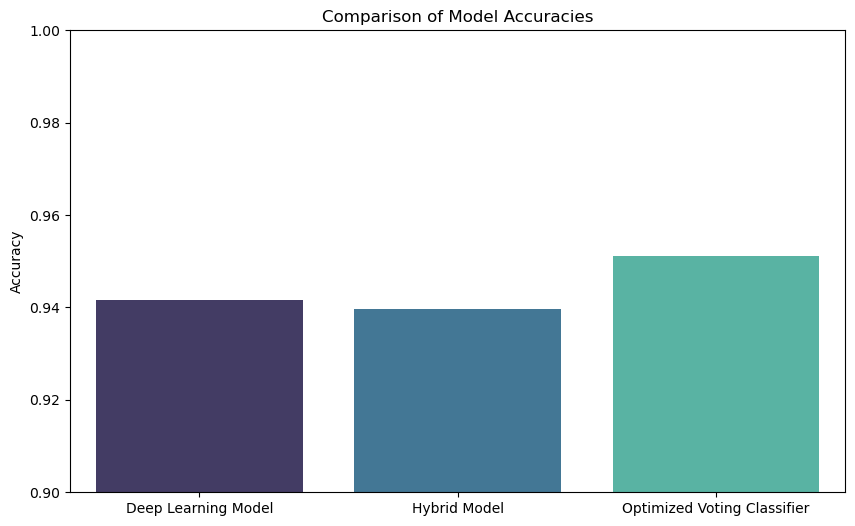

In [220]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# ===============================
# 1️⃣ Deep Learning Model
# ===============================
deep_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

deep_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=0)

deep_loss, deep_acc = deep_model.evaluate(X_test, y_test, verbose=0)
print(f"🔹 Deep Learning Accuracy: {deep_acc:.4f}")

# ===============================
# 2️⃣ Hybrid Model (Deep Learning + Ensemble)
# ===============================
# Get deep model predictions as features
deep_train_preds = deep_model.predict(X_train).flatten()
deep_test_preds = deep_model.predict(X_test).flatten()

import numpy as np

# Concatenate deep features with original features
X_train_hybrid = np.concatenate((X_train, deep_train_preds.reshape(-1,1)), axis=1)
X_test_hybrid = np.concatenate((X_test, deep_test_preds.reshape(-1,1)), axis=1)

# Train ensemble on hybrid features
hybrid_model = XGBClassifier(n_estimators=100, random_state=42)
hybrid_model.fit(X_train_hybrid, y_train)
hybrid_preds = hybrid_model.predict(X_test_hybrid)
hybrid_acc = accuracy_score(y_test, hybrid_preds)
print(f"🔹 Hybrid Model Accuracy: {hybrid_acc:.4f}")

# ===============================
# 3️⃣ Optimized Voting Classifier
# ===============================
voting_model = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)),
        ('lgbm', LGBMClassifier(n_estimators=200, num_leaves=31, learning_rate=0.1, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42))
    ],
    voting='soft',
    weights=[3, 2, 1]
)

voting_model.fit(X_train, y_train)
voting_preds = voting_model.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
print(f"🔹 Optimized Voting Classifier Accuracy: {voting_acc:.4f}")

# ===============================
# 🔔 Final Comparison
# ===============================
accuracies = {
    "Deep Learning Model": deep_acc,
    "Hybrid Model": hybrid_acc,
    "Optimized Voting Classifier": voting_acc
}

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='mako')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.90, 1.0)
plt.show()
